In [2]:
from google.colab import files
x = files.upload()

Saving Maternal_Health_Risk_Data_Set.csv to Maternal_Health_Risk_Data_Set.csv


In [3]:
import pandas as pd
data = pd.read_csv('Maternal_Health_Risk_Data_Set.csv', delimiter = ',')
data.head()
# Binary classification is done in phrase 1

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,in-Risk
0,25,130,80,15.0,98.0,86,1
1,35,140,90,13.0,98.0,70,1
2,29,90,70,8.0,100.0,80,1
3,30,140,85,7.0,98.0,70,1
4,35,120,60,6.1,98.0,76,0


In [4]:
import numpy as np
dataset = np.genfromtxt('Maternal_Health_Risk_Data_Set.csv',delimiter=',', skip_header = True)
np.set_printoptions(formatter = {'float': '{:0.2f}'.format})
print(dataset.shape)

(1014, 7)


In [5]:
import random
np.random.shuffle(dataset)

In [6]:
# Split into training and validation, 20% validation set and 80% training 
index_20percent = int(0.2 * len(dataset[:, 0]))
print(index_20percent)
XVALID = dataset[:index_20percent, :-1]
YVALID = dataset[:index_20percent, -1]
XTRAIN = dataset[index_20percent:, :-1]
YTRAIN = dataset[index_20percent:, -1]

202


In [7]:
mean = XTRAIN.mean(axis = 0)
XTRAIN -= mean
range = XTRAIN.max(axis = 0) - XTRAIN.min(axis = 0)
XTRAIN /= range
# mean normalization just like in phrase 1

XVALID -= mean
XVALID /= range

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [10]:
model1 = Sequential() # Logistic regression model
model1.add(Dense(1, input_dim=len(XTRAIN[0,:]), activation='sigmoid'))
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics='accuracy' )
# activation and optimizer are changing in order to find highest validation accuracy

In [189]:
history = model1.fit(x= XTRAIN, y=YTRAIN, validation_data = (XVALID, YVALID), epochs = 1536, verbose = 1) 

Epoch 1/1536
26/26 [==============================] - 1s 15ms/step - loss: 0.7066 - accuracy: 0.5308 - val_loss: 0.7100 - val_accuracy: 0.5248
Epoch 2/1536
26/26 [==============================] - 0s 5ms/step - loss: 0.7010 - accuracy: 0.5456 - val_loss: 0.7062 - val_accuracy: 0.5099
Epoch 3/1536
26/26 [==============================] - 0s 5ms/step - loss: 0.6960 - accuracy: 0.5308 - val_loss: 0.7023 - val_accuracy: 0.4851
Epoch 4/1536
26/26 [==============================] - 0s 6ms/step - loss: 0.6910 - accuracy: 0.5271 - val_loss: 0.6988 - val_accuracy: 0.4752
Epoch 5/1536
26/26 [==============================] - 0s 5ms/step - loss: 0.6863 - accuracy: 0.5222 - val_loss: 0.6958 - val_accuracy: 0.5000
Epoch 6/1536
26/26 [==============================] - 0s 5ms/step - loss: 0.6819 - accuracy: 0.5259 - val_loss: 0.6926 - val_accuracy: 0.5050
Epoch 7/1536
26/26 [==============================] - 0s 7ms/step - loss: 0.6776 - accuracy: 0.5283 - val_loss: 0.6896 - val_accuracy: 0.5050
Epoch

{'verbose': 1, 'epochs': 1536, 'steps': 26}


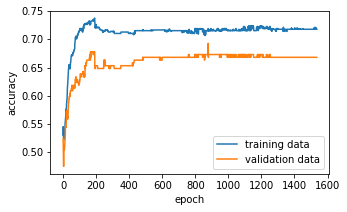

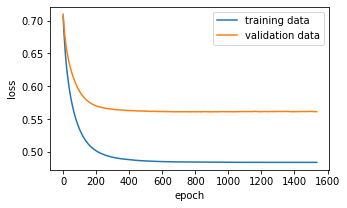

In [190]:
print(history.params)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

plt.plot(history.history['loss']) # replace with accuracy/MAE
plt.plot(history.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

In [191]:
#Evaluate on the train set
P1 = model1.predict(XTRAIN)
accuracy = model1.evaluate(XTRAIN, YTRAIN)
my_f1 = f1_score(YTRAIN, P1.round())
my_precision = precision_score(YTRAIN, P1.round())
print("f1: ",my_f1)
print("precision: ",my_precision)

26/26 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.7180
f1:  0.7693856998992951
precision:  0.7579365079365079


In [192]:
#Evaluate on the validation set
P1 = model1.predict(XVALID)
accuracy = model1.evaluate(XVALID, YVALID)
my_f1 = f1_score(YVALID, P1.round())
my_precision = precision_score(YVALID, P1.round())
print("f1: ",my_f1)
print("precision: ",my_precision)

7/7 [==============================] - 0s 3ms/step - loss: 0.5615 - accuracy: 0.6683
f1:  0.7413127413127413
precision:  0.6857142857142857


In [33]:
model2= Sequential() # multi-layer network
model2.add(Dense(16, input_dim= len(XTRAIN[0,:]), activation = 'relu' ))
model2.add(Dense(8, activation = 'relu' ))
model2.add(Dense(4, activation = 'relu' ))
model2.add(Dense(2, activation = 'relu' ))
model2.add(Dense(1, activation = 'sigmoid')) 
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics='accuracy' )
# activation and optimizer are changing in order to find highest validation accuracy

In [34]:
history2 = model2.fit(x= XTRAIN, y=YTRAIN, validation_data = (XVALID, YVALID), epochs = 256, verbose = 1) 

Epoch 1/256
26/26 [==============================] - 1s 10ms/step - loss: 0.6735 - accuracy: 0.5998 - val_loss: 0.6690 - val_accuracy: 0.5941
Epoch 2/256
26/26 [==============================] - 0s 3ms/step - loss: 0.6503 - accuracy: 0.6010 - val_loss: 0.6510 - val_accuracy: 0.5941
Epoch 3/256
26/26 [==============================] - 0s 3ms/step - loss: 0.6261 - accuracy: 0.6010 - val_loss: 0.6314 - val_accuracy: 0.5941
Epoch 4/256
26/26 [==============================] - 0s 3ms/step - loss: 0.6011 - accuracy: 0.6010 - val_loss: 0.6126 - val_accuracy: 0.5941
Epoch 5/256
26/26 [==============================] - 0s 4ms/step - loss: 0.5784 - accuracy: 0.6059 - val_loss: 0.5980 - val_accuracy: 0.6436
Epoch 6/256
26/26 [==============================] - 0s 3ms/step - loss: 0.5597 - accuracy: 0.7032 - val_loss: 0.5846 - val_accuracy: 0.6584
Epoch 7/256
26/26 [==============================] - 0s 4ms/step - loss: 0.5422 - accuracy: 0.7167 - val_loss: 0.5714 - val_accuracy: 0.6733
Epoch 8/256


{'verbose': 1, 'epochs': 256, 'steps': 26}


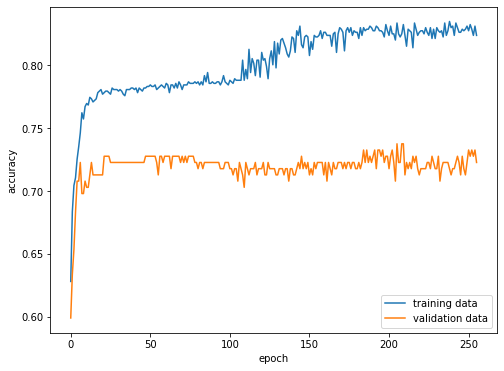

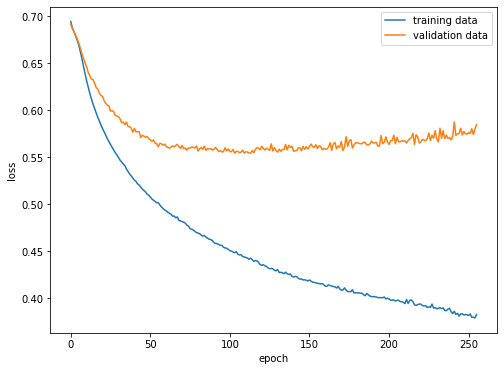

In [29]:
print(history2.params)
# Plot the learning curves (loss/accuracy/MAE)
history = history2
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

plt.plot(history.history['loss']) # replace with accuracy/MAE
plt.plot(history.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

In [23]:
#Evaluate on the train set
P2 = model2.predict(XTRAIN)
accuracy = model2.evaluate(XTRAIN, YTRAIN)
my_f1 = f1_score(YTRAIN, P2.round())
my_precision = precision_score(YTRAIN, P2.round())
print("f1: ",my_f1)
print("precision: ",my_precision)

26/26 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.8140
f1:  0.8346111719605696
precision:  0.900709219858156


In [ ]:
#Evaluate on the validation set
P2 = model2.predict(XVALID)
accuracy = model2.evaluate(XVALID, YVALID)
my_f1 = f1_score(YVALID, P2.round())
my_precision = precision_score(YVALID, P2.round())
print("f1: ",my_f1)
print("precision: ",my_precision)

In [9]:
model3= Sequential() # multi-layer network
model3.add(Dense(8, input_dim= len(XTRAIN[0,:]), activation = 'relu' ))
model3.add(Dense(4, activation = 'relu' ))
model3.add(Dense(2, activation = 'relu' ))
model3.add(Dense(1, activation = 'sigmoid')) 
model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics='accuracy' )
# activation and optimizer are changing in order to find highest validation accuracy

In [10]:
history3 = model3.fit(x= XTRAIN, y=YTRAIN, validation_data = (XVALID, YVALID), epochs = 512, verbose = 1) 

Epoch 1/512
26/26 [==============================] - 1s 11ms/step - loss: 0.6842 - accuracy: 0.5850 - val_loss: 0.6807 - val_accuracy: 0.6188
Epoch 2/512
26/26 [==============================] - 0s 3ms/step - loss: 0.6758 - accuracy: 0.5948 - val_loss: 0.6712 - val_accuracy: 0.6188
Epoch 3/512
26/26 [==============================] - 0s 3ms/step - loss: 0.6668 - accuracy: 0.5948 - val_loss: 0.6626 - val_accuracy: 0.6188
Epoch 4/512
26/26 [==============================] - 0s 3ms/step - loss: 0.6583 - accuracy: 0.5948 - val_loss: 0.6542 - val_accuracy: 0.6188
Epoch 5/512
26/26 [==============================] - 0s 3ms/step - loss: 0.6502 - accuracy: 0.5948 - val_loss: 0.6457 - val_accuracy: 0.6188
Epoch 6/512
26/26 [==============================] - 0s 3ms/step - loss: 0.6415 - accuracy: 0.5948 - val_loss: 0.6366 - val_accuracy: 0.6188
Epoch 7/512
26/26 [==============================] - 0s 4ms/step - loss: 0.6325 - accuracy: 0.5948 - val_loss: 0.6274 - val_accuracy: 0.6188
Epoch 8/512


{'verbose': 1, 'epochs': 512, 'steps': 26}


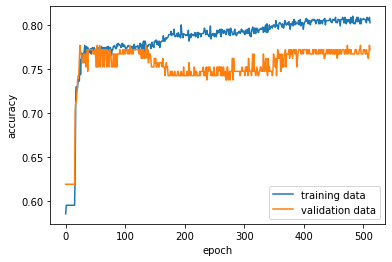

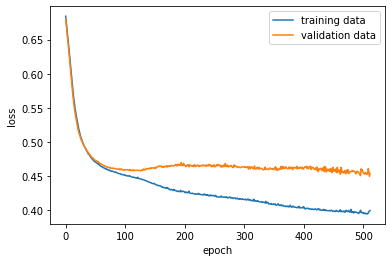

In [11]:
print(history3.params)
# Plot the learning curves (loss/accuracy/MAE)
history = history3
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

plt.plot(history.history['loss']) # replace with accuracy/MAE
plt.plot(history.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

In [12]:
#Evaluate on the train set
P3 = model3.predict(XTRAIN)
accuracy = model3.evaluate(XTRAIN, YTRAIN)
my_f1 = f1_score(YTRAIN, P3.round())
my_precision = precision_score(YTRAIN, P3.round())
print("f1: ",my_f1)
print("precision: ",my_precision)

26/26 [==============================] - 0s 1ms/step - loss: 0.3943 - accuracy: 0.8079
f1:  0.8235294117647058
precision:  0.9077306733167082


In [13]:
#Evaluate on the validation set
P3 = model3.predict(XVALID)
accuracy = model3.evaluate(XVALID, YVALID)
my_f1 = f1_score(YVALID, P3.round())
my_precision = precision_score(YVALID, P3.round())
print("f1: ",my_f1)
print("precision: ",my_precision)

7/7 [==============================] - 0s 2ms/step - loss: 0.4538 - accuracy: 0.7723
f1:  0.7946428571428571
precision:  0.898989898989899


In [58]:
model4= Sequential() # multi-layer network
model4.add(Dense(4, input_dim= len(XTRAIN[0,:]), activation = 'relu' ))
model4.add(Dense(1, activation = 'sigmoid')) 
model4.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics='accuracy' )
# activation and optimizer are changing in order to find highest validation accuracy

In [59]:
history4 = model4.fit(x= XTRAIN, y=YTRAIN, validation_data = (XVALID, YVALID), epochs = 256, verbose = 1) 

Epoch 1/256
26/26 [==============================] - 1s 8ms/step - loss: 0.6774 - accuracy: 0.5727 - val_loss: 0.6786 - val_accuracy: 0.5891
Epoch 2/256
26/26 [==============================] - 0s 3ms/step - loss: 0.6668 - accuracy: 0.6170 - val_loss: 0.6706 - val_accuracy: 0.5990
Epoch 3/256
26/26 [==============================] - 0s 3ms/step - loss: 0.6567 - accuracy: 0.6441 - val_loss: 0.6628 - val_accuracy: 0.6337
Epoch 4/256
26/26 [==============================] - 0s 3ms/step - loss: 0.6470 - accuracy: 0.6638 - val_loss: 0.6553 - val_accuracy: 0.6386
Epoch 5/256
26/26 [==============================] - 0s 3ms/step - loss: 0.6379 - accuracy: 0.6749 - val_loss: 0.6481 - val_accuracy: 0.6584
Epoch 6/256
26/26 [==============================] - 0s 4ms/step - loss: 0.6291 - accuracy: 0.6872 - val_loss: 0.6414 - val_accuracy: 0.6584
Epoch 7/256
26/26 [==============================] - 0s 3ms/step - loss: 0.6211 - accuracy: 0.6884 - val_loss: 0.6355 - val_accuracy: 0.6733
Epoch 8/256
2

{'verbose': 1, 'epochs': 256, 'steps': 26}


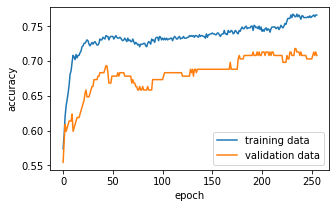

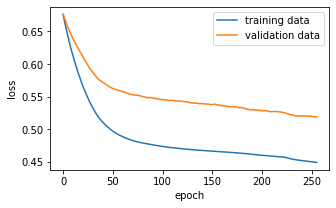

In [185]:
print(history4.params)
# Plot the learning curves (loss/accuracy/MAE)
history = history4
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

plt.plot(history.history['loss']) # replace with accuracy/MAE
plt.plot(history.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

In [186]:
#Evaluate on the train set
P4 = model4.predict(XTRAIN)
accuracy = model4.evaluate(XTRAIN, YTRAIN)
my_f1 = f1_score(YTRAIN, P4.round())
my_precision = precision_score(YTRAIN, P4.round())
print("f1: ",my_f1)
print("precision: ",my_precision)

26/26 [==============================] - 0s 1ms/step - loss: 0.4490 - accuracy: 0.7660
f1:  0.7898230088495576
precision:  0.8602409638554217


In [187]:
#Evaluate on the validation set
P4 = model4.predict(XVALID)
accuracy = model4.evaluate(XVALID, YVALID)
my_f1 = f1_score(YVALID, P4.round())
my_precision = precision_score(YVALID, P4.round())
print("f1: ",my_f1)
print("precision: ",my_precision)

7/7 [==============================] - 0s 2ms/step - loss: 0.5193 - accuracy: 0.7079
f1:  0.748936170212766
precision:  0.7586206896551724


In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# File name must be in quotes
callback_a = ModelCheckpoint(filepath = 'Maternal_Health_Risk_Data_Set.csv', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
# The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

In [24]:
history = model3.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), batch_size=1,epochs=50, callbacks = [callback_a, callback_b])

Epoch 1/50
793/812 [============================>.] - ETA: 0s - loss: 0.4341 - accuracy: 0.7680
Epoch 1: val_loss improved from inf to 0.54722, saving model to Maternal_Health_Risk_Data_Set.csv
812/812 [==============================] - 2s 3ms/step - loss: 0.4307 - accuracy: 0.7709 - val_loss: 0.5472 - val_accuracy: 0.7079
Epoch 2/50
810/812 [============================>.] - ETA: 0s - loss: 0.4149 - accuracy: 0.7963
Epoch 2: val_loss improved from 0.54722 to 0.54328, saving model to Maternal_Health_Risk_Data_Set.csv
812/812 [==============================] - 2s 2ms/step - loss: 0.4162 - accuracy: 0.7943 - val_loss: 0.5433 - val_accuracy: 0.6931
Epoch 3/50
804/812 [============================>.] - ETA: 0s - loss: 0.4131 - accuracy: 0.7998
Epoch 3: val_loss improved from 0.54328 to 0.54295, saving model to Maternal_Health_Risk_Data_Set.csv
812/812 [==============================] - 2s 2ms/step - loss: 0.4116 - accuracy: 0.8005 - val_loss: 0.5430 - val_accuracy: 0.6980
Epoch 4/50
785/81

In [25]:
# File name must be in quotes
model3.load_weights('Maternal_Health_Risk_Data_Set.csv')

{'verbose': 1, 'epochs': 512, 'steps': 26}


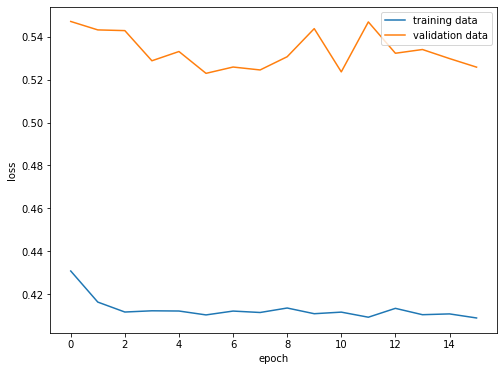

In [26]:
print(history3.params)
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(history.history['loss']) # replace with accuracy/MAE
plt.plot(history.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

In [76]:
# graduate student requirement question 1

XV = dataset[:index_20percent, :]
YV = dataset[:index_20percent, -1]
XT = dataset[index_20percent:, :]
YT = dataset[index_20percent:, -1]
# nomalization
# XT -= mean
# XT /= range
# XV -= mean
# XV /= range

In [77]:
model5 = Sequential() # Logistic regression model
model5.add(Dense(1, input_dim=len(XT[0,:]), activation='sigmoid'))
model5.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics='accuracy' )
# activation and optimizer are changing in order to find highest validation accuracy

In [78]:
history = model5.fit(x= XT, y=YT, validation_data = (XV, YV), epochs = 512, verbose = 1) 

Epoch 1/512
26/26 [==============================] - 1s 12ms/step - loss: 0.9457 - accuracy: 0.2167 - val_loss: 0.9493 - val_accuracy: 0.2327
Epoch 2/512
26/26 [==============================] - 0s 5ms/step - loss: 0.9271 - accuracy: 0.2044 - val_loss: 0.9320 - val_accuracy: 0.2376
Epoch 3/512
26/26 [==============================] - 0s 5ms/step - loss: 0.9094 - accuracy: 0.2069 - val_loss: 0.9158 - val_accuracy: 0.2376
Epoch 4/512
26/26 [==============================] - 0s 5ms/step - loss: 0.8923 - accuracy: 0.2044 - val_loss: 0.9006 - val_accuracy: 0.2327
Epoch 5/512
26/26 [==============================] - 0s 4ms/step - loss: 0.8762 - accuracy: 0.2094 - val_loss: 0.8849 - val_accuracy: 0.2277
Epoch 6/512
26/26 [==============================] - 0s 7ms/step - loss: 0.8601 - accuracy: 0.2340 - val_loss: 0.8706 - val_accuracy: 0.2327
Epoch 7/512
26/26 [==============================] - 0s 8ms/step - loss: 0.8450 - accuracy: 0.2574 - val_loss: 0.8561 - val_accuracy: 0.2673
Epoch 8/512


{'verbose': 1, 'epochs': 512, 'steps': 26}


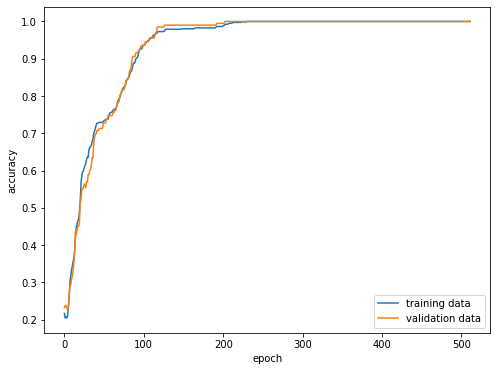

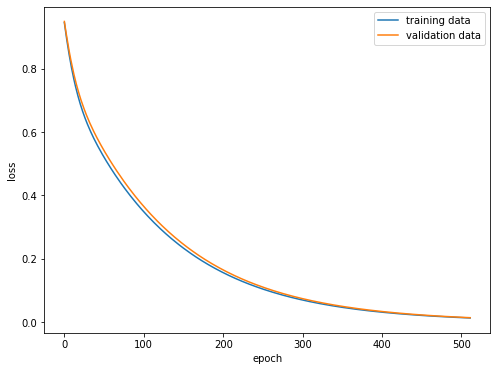

In [79]:
print(history.params)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

plt.plot(history.history['loss']) # replace with accuracy/MAE
plt.plot(history.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

In [19]:
# graduate student Q2
# first see how model3 predict the output
predictions = model3.predict(XVALID)
print(predictions[:10].T)
print(YVALID[:10])

[[0.28 0.28 0.28 1.00 0.28 0.67 0.40 0.59 0.28 0.99]]
[0.00 0.00 0.00 1.00 0.00 1.00 1.00 1.00 0.00 1.00]


In [20]:
def my_prediction_function(model,data):
  w =[None]*6
  for i in range(6):  
    w[i] = model.layers[3].get_weights()[0][i]
    bias = model.layers[3].get_weights()[1]   
  z = 0
  for i in range(6):
    z = z + data[:,i]*w[i]
  z = z + bias
  result = 1/(1+np.exp(-z))
  return result 
  # this one isn't working due to some weird errors

In [21]:
def my_predict(final_best_model, XVALID):
#parameters of 4 layers
# without doing iteration, this is manually doing prediction according to my layers situation
    W0 = final_best_model.get_weights()[0]
    b0 = final_best_model.get_weights()[1]
      
    W1 = final_best_model.get_weights()[2]
    b1 = final_best_model.get_weights()[3]

    W2 = final_best_model.get_weights()[4]
    b2 = final_best_model.get_weights()[5]

    W3 = final_best_model.get_weights()[6]
    b3 = final_best_model.get_weights()[7]

    L1 = np.dot(XVALID,W0)+b0
    X2 = np.maximum(L1,0)

    L2 = np.dot(X2,W1)+b1
    X3 = np.maximum(L2,0)

    L3 = np.dot(X3,W2)+b2
    X4 = np.maximum(L3,0)

    L4 = np.dot(X4,W3)+b3
    print(L4)

    # Sigmoid
    output = 1/(1+np.exp(-L4))
    return output

In [22]:
my_pre = my_predict(model3, XVALID)

[[-0.93]
 [-0.93]
 [-0.93]
 [24.81]
 [-0.93]
 [0.69]
 [-0.42]
 [0.37]
 [-0.93]
 [4.40]
 [-0.93]
 [0.96]
 [20.79]
 [-0.93]
 [3.93]
 [-0.35]
 [24.29]
 [0.45]
 [0.55]
 [28.59]
 [11.78]
 [-0.93]
 [-0.93]
 [-0.50]
 [7.82]
 [34.01]
 [-0.93]
 [-0.93]
 [1.84]
 [-0.93]
 [-0.93]
 [8.96]
 [-0.93]
 [-0.50]
 [11.28]
 [0.23]
 [-0.93]
 [-0.93]
 [17.68]
 [19.85]
 [22.74]
 [1.96]
 [1.31]
 [1.31]
 [1.31]
 [54.12]
 [-0.93]
 [-0.85]
 [0.76]
 [19.76]
 [1.67]
 [-0.93]
 [7.73]
 [4.71]
 [-0.93]
 [7.73]
 [18.22]
 [-0.93]
 [-0.93]
 [20.19]
 [-0.93]
 [-0.93]
 [-0.93]
 [30.53]
 [3.33]
 [19.28]
 [3.63]
 [34.20]
 [54.12]
 [28.48]
 [-0.93]
 [-0.93]
 [-0.93]
 [8.53]
 [-0.57]
 [31.26]
 [-0.93]
 [-0.93]
 [-0.93]
 [-0.50]
 [-0.93]
 [38.44]
 [1.14]
 [1.31]
 [0.37]
 [-0.93]
 [9.48]
 [-0.93]
 [-0.93]
 [-0.50]
 [-0.93]
 [-0.93]
 [4.40]
 [-0.93]
 [-0.93]
 [-0.93]
 [-0.93]
 [-0.93]
 [4.40]
 [3.93]
 [1.14]
 [28.59]
 [-0.93]
 [7.54]
 [-0.93]
 [54.12]
 [-0.93]
 [10.15]
 [-0.93]
 [-0.65]
 [-0.93]
 [-0.81]
 [-0.93]
 [-0.93]
 [0.14

In [24]:
print("my predcition: ", my_pre[:10].T)
print("model.predict: ", predictions[:10].T)
print("true value: ", YVALID[:10])

my predcition:  [[0.28 0.28 0.28 1.00 0.28 0.67 0.40 0.59 0.28 0.99]]
model.predict:  [[0.28 0.28 0.28 1.00 0.28 0.67 0.40 0.59 0.28 0.99]]
true value:  [0.00 0.00 0.00 1.00 0.00 1.00 1.00 1.00 0.00 1.00]


In [25]:
%%shell
jupyter nbconvert --to html /content/Phrase_3_report.ipynb

[NbConvertApp] WARNING | pattern '/content/Phrase_3_report.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]


CalledProcessError: ignored